# Day 2 — Numpy + Pandas + Matplotlib 练习

🎯 学习目标：
- 熟悉 **Numpy** 数组与矩阵运算、广播机制
- 掌握 **Pandas** 数据处理与统计
- 学会用 **Matplotlib** 进行可视化

📌 本 Notebook 将通过小练习，串联起数值计算 → 数据处理 → 可视化的完整流程，为后续推荐系统实验做准备。


## Numpy

In [11]:
import numpy as np
import time

# 1. 数组创建
a = np.array([1,2,3])
b = np.zeros((2,3))
c = np.ones((3,3))
d = np.random.randn(3,3)

print("a:", a)
print("b:\n", b)
print("c:\n", c)
print("d:\n", d)

# 2. 矩阵运算
A = np.random.rand(3,3)
B = np.random.rand(3,3)
print("A+B=\n", A+B)
print("A@B=\n", A@B)

# 3. 广播机制
x = np.array([[1],[2],[3]])
y = np.array([10,20,30])
print("Broadcast add:\n", x+y)



a: [1 2 3]
b:
 [[0. 0. 0.]
 [0. 0. 0.]]
c:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
d:
 [[ 0.82229701  0.29546101  0.24663971]
 [ 1.93468524  0.03272533  0.88937766]
 [-0.416591   -0.04053164  0.49471447]]
A+B=
 [[1.05590375 0.57985057 1.29361365]
 [1.30782325 1.33943629 0.48542583]
 [1.60881021 0.55388761 0.90489501]]
A@B=
 [[0.89393162 0.46168354 0.89863082]
 [1.28564353 0.6530225  0.95910443]
 [0.78221427 0.25751367 0.531423  ]]
Broadcast add:
 [[11 21 31]
 [12 22 32]
 [13 23 33]]


In [12]:

# 4. 向量化 vs 循环
N = 300
X = np.random.rand(N,N)
Y = np.random.rand(N,N)

# for 循环
start = time.time()
Z1 = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Z1[i,j] = np.dot(X[i,:], Y[:,j])
print("Loop time:", time.time()-start)

# numpy matmul
start = time.time()
Z2 = X @ Y
print("Numpy matmul time:", time.time()-start)

# 5. 线性代数：SVD
M = np.random.rand(5,3)
U,S,Vt = np.linalg.svd(M)
print("SVD shapes:", U.shape, S.shape, Vt.shape)

Loop time: 0.1660473346710205
Numpy matmul time: 0.0020079612731933594
SVD shapes: (5, 5) (3,) (3, 3)


## Pandas

### reset_index()

`reset_index()` 方法可以将 DataFrame 的索引重置为默认的整数索引。

当使用 `groupby()`, `set_index()`, 或其他操作后，分组键或设置的索引会变成 DataFrame 的索引。有时候你需要将这些索引值变回普通的列以便进一步处理。

In [18]:
import pandas as pd

df = pd.DataFrame({
    "user_id": [1,1,2,2,3,3,3],
    "movie_id": [101,102,101,103,104,105,101],
    "rating": [5,4,5,3,2,4,1]
})

print("Basic Info:")
print(df.head())

# 用户平均评分
user_mean = df.groupby("user_id")["rating"].mean().reset_index()    # reset_index() 重置索引, 如果不重置索引, 则索引为 user_id
print("User mean rating:\n", user_mean)

# 电影评分次数
movie_count = df.groupby("movie_id")["rating"].count().reset_index(name="count") # reset_index(name="count")，name的作用是给新的一列命名
print("Movie rating count:\n", movie_count)


Basic Info:
   user_id  movie_id  rating
0        1       101       5
1        1       102       4
2        2       101       5
3        2       103       3
4        3       104       2
User mean rating:
    user_id    rating
0        1  4.500000
1        2  4.000000
2        3  2.333333
Movie rating count:
    movie_id  count
0       101      3
1       102      1
2       103      1
3       104      1
4       105      1


## Matplotlib 

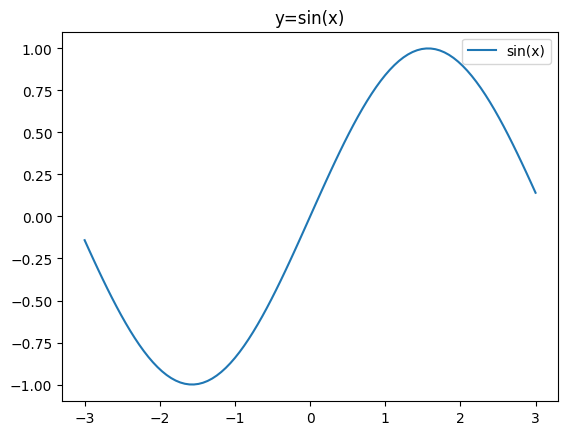

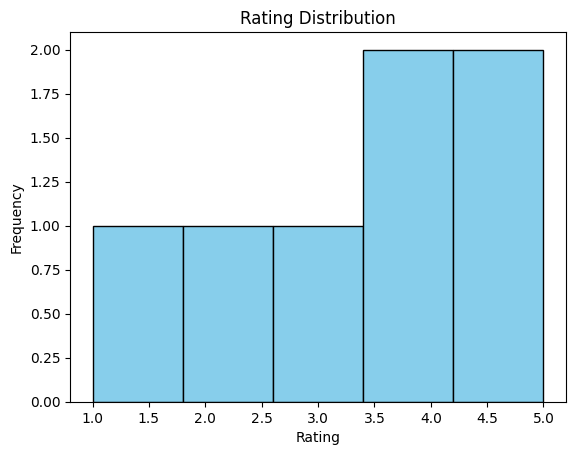

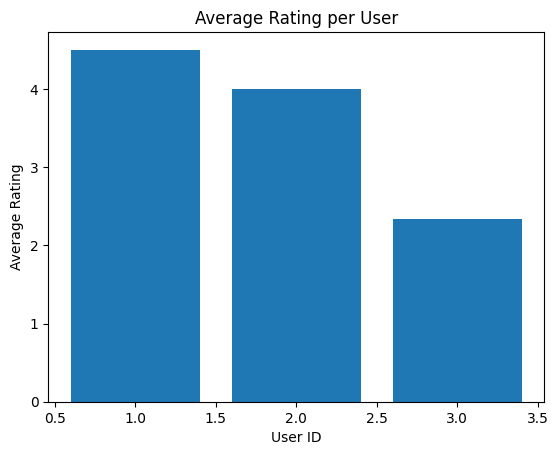

In [19]:
import matplotlib.pyplot as plt

# y=sin(x)
x = np.linspace(-3, 3, 100)
y = np.sin(x)
plt.plot(x, y, label="sin(x)")
plt.title("y=sin(x)")
plt.legend()
plt.show()

# 直方图：评分分布
plt.hist(df["rating"], bins=5, color="skyblue", edgecolor="black")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 柱状图：用户平均评分
plt.bar(user_mean["user_id"], user_mean["rating"])
plt.title("Average Rating per User")
plt.xlabel("User ID")
plt.ylabel("Average Rating")
plt.show()


📌 总结：
- Numpy 数组与矩阵乘法使用
- Pandas 数据采集与处理
- Matplotlib 数据可视化
